In [0]:
import pandas as pd
import seaborn as sns


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 7210_1.csv to 7210_1.csv
User uploaded file "7210_1.csv" with length 107048266 bytes


In [0]:
data = pd.read_csv('7210_1.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data.shape

(33801, 52)

In [0]:
data.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,ean,features,flavors,imageURLs,isbn,keys,manufacturer,manufacturerNumber,merchants,name,prices.amountMin,prices.amountMax,prices.availability,prices.color,prices.condition,prices.count,prices.currency,prices.dateAdded,prices.dateSeen,prices.flavor,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.source,prices.sourceURLs,prices.warranty,quantities,reviews,sizes,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",NaN,NaN,NaN,handcraftedalpacablendpurplecharismasweaterper...,NaN,231516,NaN,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,NaN,NaN,NaN,USD,2017-03-28T11:53:51Z,2017-03-26T05:04:46.539Z,NaN,False,Overstock.com,NaN,NaN,NaN,L,NaN,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",NaN,NaN,NaN,handcraftedalpacablendpurplecharismasweaterper...,NaN,231516,NaN,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,NaN,NaN,NaN,USD,2017-03-28T11:53:51Z,2017-03-26T05:04:46.539Z,NaN,False,Overstock.com,NaN,NaN,NaN,M,NaN,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",NaN,NaN,NaN,handcraftedalpacablendpurplecharismasweaterper...,NaN,231516,NaN,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,NaN,NaN,NaN,USD,2017-03-28T11:53:51Z,2017-03-26T05:04:46.539Z,NaN,False,Overstock.com,NaN,NaN,NaN,S,NaN,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,NaN,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...",NaN,NaN,NaN,handcraftedalpacablendpurplecharismasweaterper...,NaN,231516,NaN,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,62.99,62.99,NaN,NaN,NaN,NaN,USD,2017-03-28T11:53:51Z,2017-03-26T05:04:46.539Z,NaN,False,Overstock.com,NaN,NaN,NaN,XL,NaN,https://www.overstock.com/Worldstock-Fair-Trad...,NaN,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",NaN,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T0

проверим сколько пустых значений

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 52 columns):
id                     33801 non-null object
asins                  2422 non-null object
brand                  32817 non-null object
categories             33801 non-null object
colors                 19844 non-null object
count                  0 non-null float64
dateAdded              33801 non-null object
dateUpdated            33801 non-null object
descriptions           28425 non-null object
dimension              1177 non-null object
ean                    9778 non-null float64
features               27181 non-null object
flavors                0 non-null float64
imageURLs              22309 non-null object
isbn                   0 non-null float64
keys                   33801 non-null object
manufacturer           9279 non-null object
manufacturerNumber     31434 non-null object
merchants              15382 non-null object
name                   33801 non-null object
pri

посмотрим типы признаков

In [0]:
data.dtypes

id                      object
asins                   object
brand                   object
categories              object
colors                  object
count                  float64
dateAdded               object
dateUpdated             object
descriptions            object
dimension               object
ean                    float64
features                object
flavors                float64
imageURLs               object
isbn                   float64
keys                    object
manufacturer            object
manufacturerNumber      object
merchants               object
name                    object
prices.amountMin       float64
prices.amountMax       float64
prices.availability     object
prices.color            object
prices.condition        object
prices.count           float64
prices.currency         object
prices.dateAdded        object
prices.dateSeen         object
prices.flavor          float64
prices.isSale             bool
prices.merchant         object
prices.o

In [0]:
df= data.copy()

In [0]:
columns_name = ['brand', 'prices.amountMax', 'prices.amountMin', 'colors']
df = df[columns_name]
df.head()

,brand,prices.amountMax,prices.amountMin,colors
0,Novica,62.99,62.99,Purple
1,Novica,62.99,62.99,Purple
2,Novica,62.99,62.99,Purple
3,Novica,62.99,62.99,Purple
4,Novica,62.99,62.99,Purple


In [0]:
# change brand name to lower case
df['brand'] = df['brand'].str.lower()

In [0]:
df['prices'] = (df['prices.amountMax'] + df['prices.amountMin']) / 2

In [0]:
df['prices'].min()

0.01

In [0]:
df['prices'].max()

4270.0

In [0]:
df['prices'].mean()

88.30303777998186

In [0]:
df['prices'].median()

53.16

In [0]:
df['prices'].mode()

0    39.99
dtype: float64

In [0]:
df. describe()

,prices.amountMax,prices.amountMin,prices
count,33801.000000,33801.000000,33801.000000
mean,88.950277,87.655798,88.303038
std,151.579682,146.158393,147.504127
min,0.010000,0.010000,0.010000
25%,34.390000,33.990000,34.190000
50%,53.560000,52.990000,53.160000
75%,89.950000,89.000000,89.950000
max,5200.000000,4270.000000,4270.000000


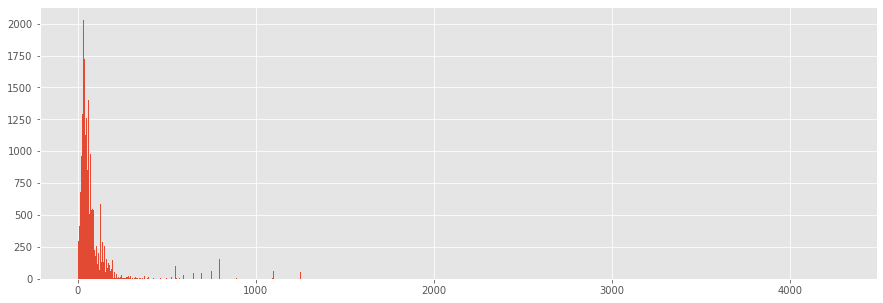

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  
plt.rcParams['figure.figsize'] = (15, 5)

df['prices'].hist(bins='fd') # посмотреть с разнім количеством bins и по умолчанию 

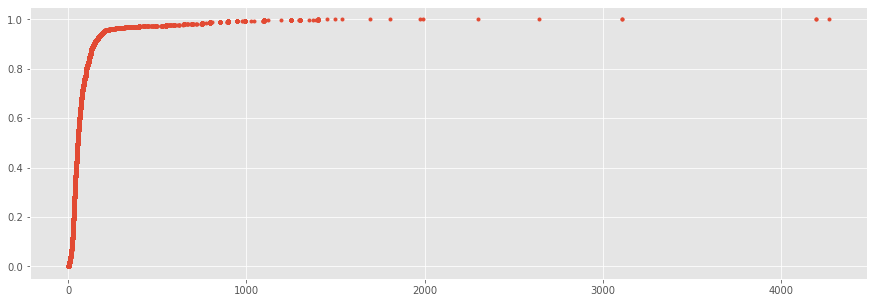

In [0]:
import numpy as np
x=np.sort(df['prices'])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,'.') #поробуйте построить без точек - нечего не понятно!!!!

{'boxes': [<matplotlib.lines.Line2D at 0x7f6046666048>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6046666ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f604666f4e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f604666f198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f60466663c8>,
  <matplotlib.lines.Line2D at 0x7f6046666780>]}

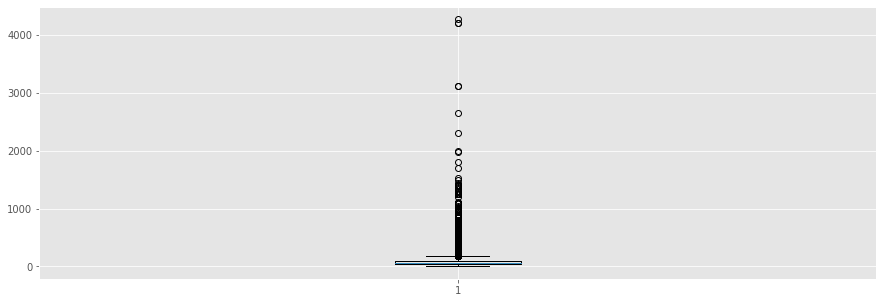

In [0]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['prices'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f604663ec88>],
 'caps': [<matplotlib.lines.Line2D at 0x7f604664d518>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f604664dba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f604663edd8>,
  <matplotlib.lines.Line2D at 0x7f604664d1d0>]}

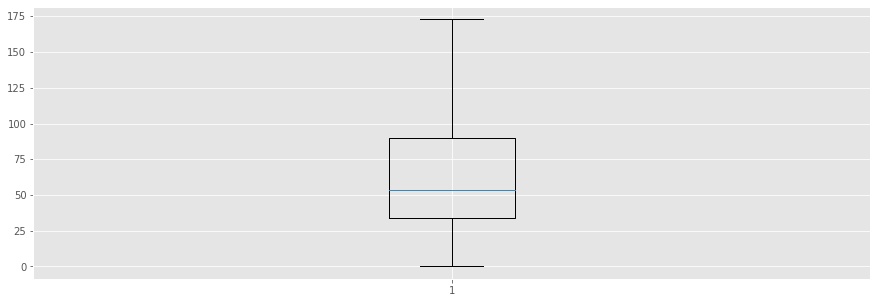

In [0]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['prices'], showfliers=False) #параметр без выбросов

In [0]:
brand = df['brand'].value_counts()[df['brand'].value_counts() > 200]
brand_names = list(pd.DataFrame(brand).index)

In [0]:
data_brand = df[df['brand'].isin(brand_names)]
data_brand.head()

,brand,prices.amountMax,prices.amountMin,colors,prices
0,novica,62.99,62.99,Purple,62.99
1,novica,62.99,62.99,Purple,62.99
2,novica,62.99,62.99,Purple,62.99
3,novica,62.99,62.99,Purple,62.99
4,novica,62.99,62.99,Purple,62.99


In [0]:
data_brand_ave = data_brand.groupby('brand')['prices.amountMin'].mean().sort_values(ascending=True)
data_brand_ave

brand
betani                             28.020149
beston                             31.395792
qupid                              31.440308
nature breeze                      33.603322
liliana                            33.646161
c label                            34.681384
hadari                             34.783953
grasshoppers                       35.740347
cape robbin                        36.656744
muk luks                           39.974815
fergalicious                       40.592967
journee collection                 42.119914
in-sattva                          42.220120
aerosoles                          44.271489
beacon shoes                       45.841089
skechers                           46.407118
vans                               47.139686
soft style                         48.012411
easy spirit                        48.824271
touch ups                          50.694733
toms                               52.019120
lugz                               53.696679
dyea

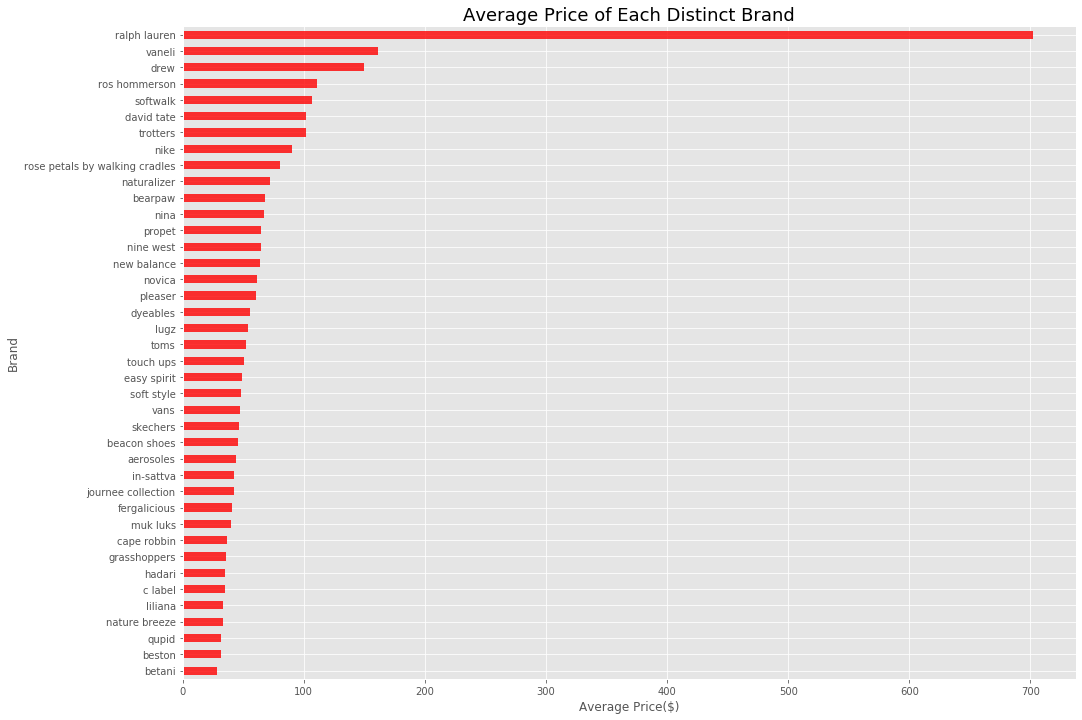

In [0]:
fig = plt.figure(figsize=(16,12))
data_brand_ave.plot(kind='barh', color='r', align='center', alpha=.8)
plt.title('Average Price of Each Distinct Brand', fontsize=18)
plt.xlabel('Average Price($)')
plt.ylabel('Brand');

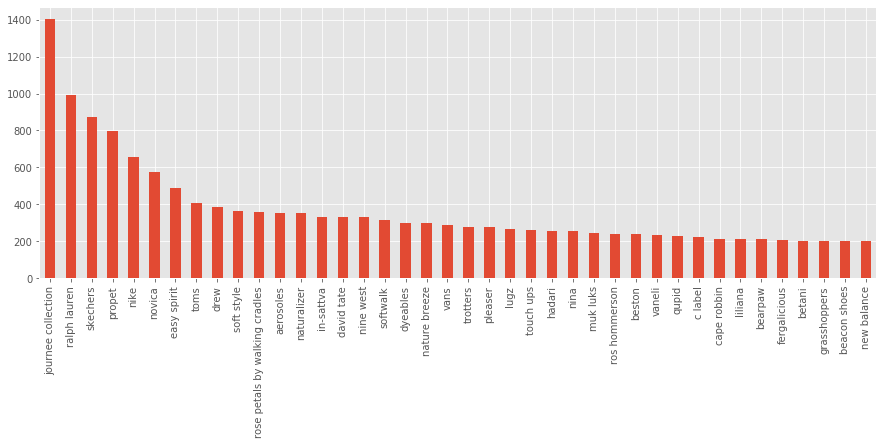

In [0]:
brand.plot(kind='bar')

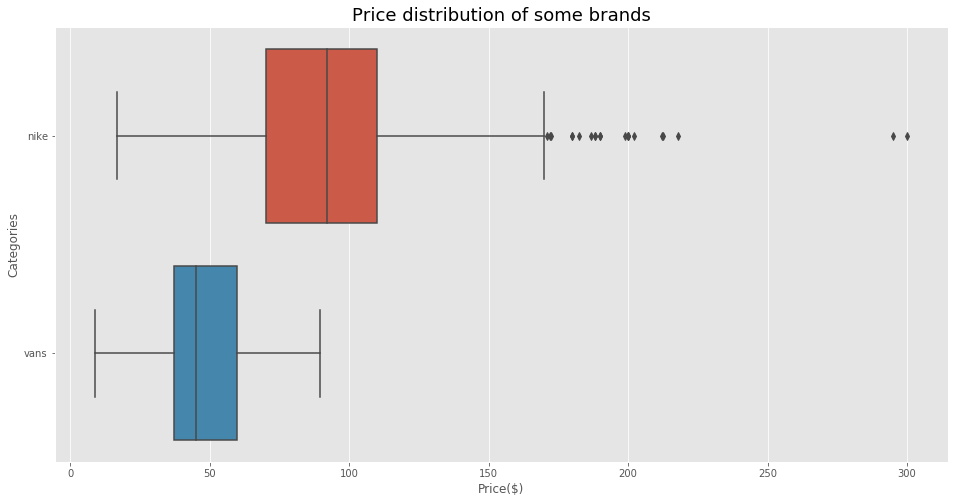

In [0]:
fig = plt.figure(figsize=(16,8))
# draw boxplot for distinct category of shoes

sns.boxplot(y='brand', x='prices', data = data_brand[(data_brand.brand =='nike')|(data_brand.brand =='vans')])
plt.title('Price distribution of some brands', fontsize=18)
plt.xlabel('Price($)')
plt.ylabel('Categories');

In [0]:
brand = df['brand'].value_counts()[df['brand'].value_counts() > 200]
brand_names = list(pd.DataFrame(brand).index)
data_brand = df[df['brand'].isin(brand_names)]
data_brand.head()

In [0]:
bb = df['brand'].value_counts()[df['brand'].value_counts() >500]
bnn = list(pd.DataFrame(bb).index)
dbb = df[df['brand'].isin(bnn)]

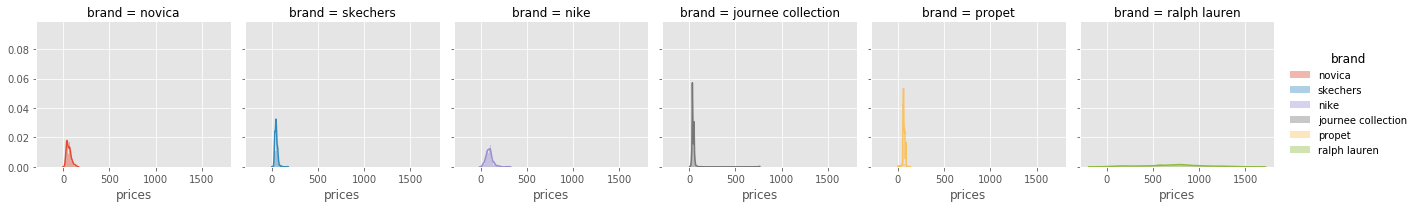

In [0]:
sns.FacetGrid(dbb,col='brand', hue='brand').map(sns.distplot,"prices").add_legend()


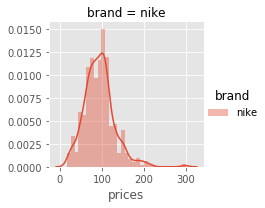

In [0]:
sns.FacetGrid(dbb[dbb.brand=='nike'],col='brand', hue='brand').map(sns.distplot,'prices').add_legend()


In [0]:
new_df=df['colors'].value_counts()
new_df

Black                                                                                                                                                                                                                                                              2928
Brown                                                                                                                                                                                                                                                               966
White                                                                                                                                                                                                                                                               690
Blue                                                                                                                                                                                                            

In [0]:
color = df['colors'].value_counts()[df['colors'].value_counts() > 300]
color

Black     2928
Brown      966
White      690
Blue       605
Silver     388
Beige      357
Red        315
Name: colors, dtype: int64

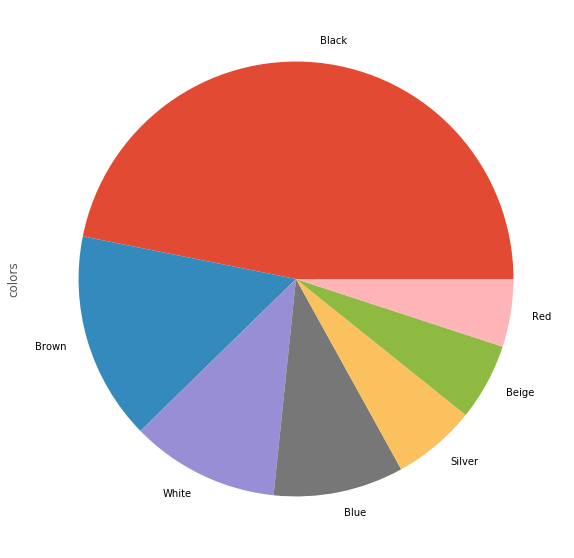

In [0]:
plot = color.plot.pie(y='colors', figsize=(10, 10))

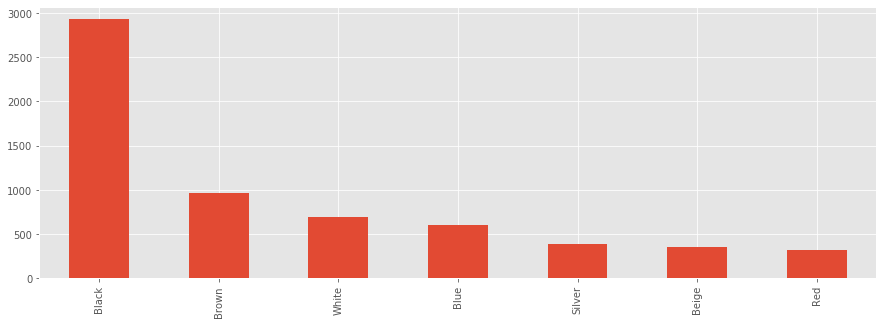

In [0]:
color.plot(kind='bar')